# Solution: major features of the atmospheric circulation

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## Sea-level pressure and surface winds  

In [6]:
ds = xr.open_dataset('C:/Users/david/OneDrive - uibk.ac.at/MA/VU Physik des Klimasystems/LectureNotebooks/Week04/ERA5_LowRes_MonthlyAvg_uvslp.nc')

**Compute $\left[ \overline{SLP} \right]$ (in hPa), and plot it. With the help of [plt.axhline](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axhline), add the [standard atmosphere pressure](https://en.wikipedia.org/wiki/Atmospheric_pressure#Standard_atmospheric) line to the plot to emphasize high and low pressure regions.**

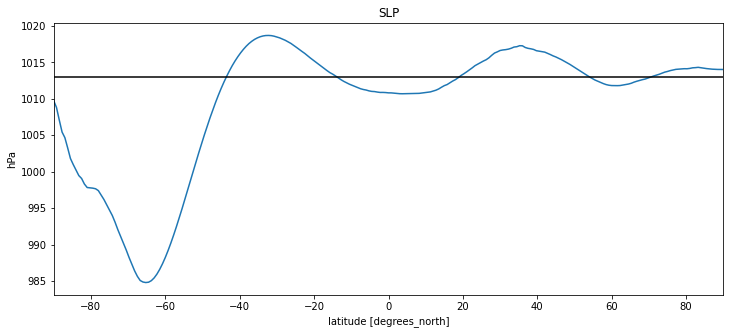

In [7]:
ds_zavg = ds.mean(dim=['month', 'longitude'])
slp_zavg = ds_zavg.msl / 100
slp_zavg.plot();
plt.axhline(1013, color='k');
plt.xlim([-90, 90]);
plt.title('SLP');
plt.ylabel('hPa');

**Repeat with $\left[ \overline{u_{10}} \right]$ and $\left[ \overline{v_{10}} \right]$ (in hPa) and the 0. horizontal line to the plot (to detect surface westerlies from easterlies for example). Analyse the three plots alltogether. How do they fit to the circulation we discussed in the lecture?**

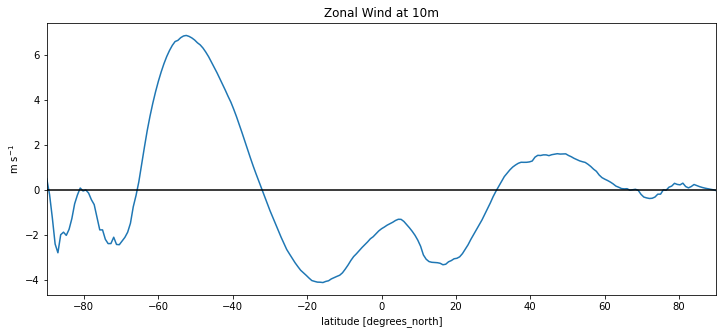

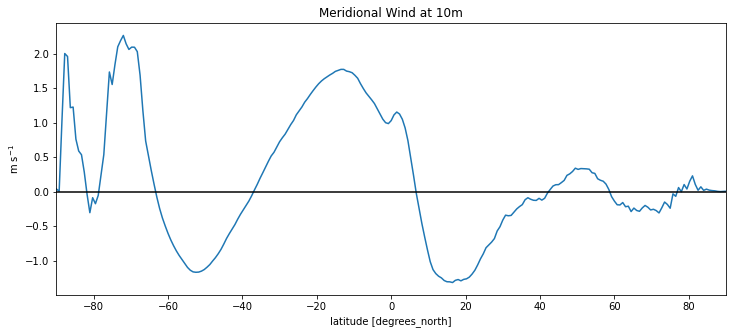

In [8]:
ds_zavg.u10.plot();
plt.axhline(0, color='k');
plt.xlim([-90, 90]);
plt.title('Zonal Wind at 10m');
plt.ylabel('m s$^{-1}$');
plt.figure();
ds_zavg.v10.plot();
plt.axhline(0, color='k');
plt.xlim([-90, 90]);
plt.title('Meridional Wind at 10m');
plt.ylabel('m s$^{-1}$');

**Plot the annual $\overline{SLP}$ on a map. Choose adequate levels and colormap, so that low pressure and high pressure systems are visible. These are called "semi-permanent highs and lows". Can you name most of them?**  

- Icelandic Low
- Aleutian Low
- Subtropical highs: Bermuda High, South/North Pacific High...
- Siberian High
- Monsoon Low (or through)
- ...

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


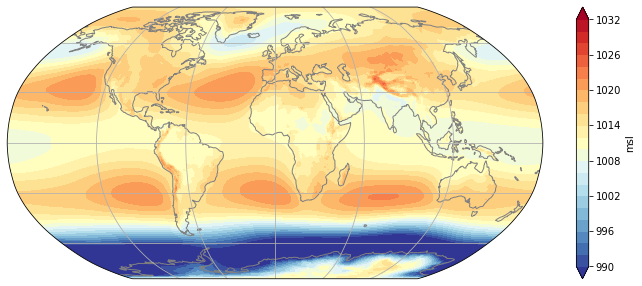

In [9]:
levels = np.arange(990, 1033, 2)
msl = ds.msl / 100
ax = plt.axes(projection=ccrs.Robinson())
msl.mean(dim='month').plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=levels, extend='both');
ax.coastlines(color='grey'); ax.gridlines(); ax.set_global();

**Now use the same colors and levels as above, and plot $\overline{SLP}$ for the months of January and July. Compare the evolution of the major systems. When are they strongest? Weakest? Which systems disappear entirely?** 

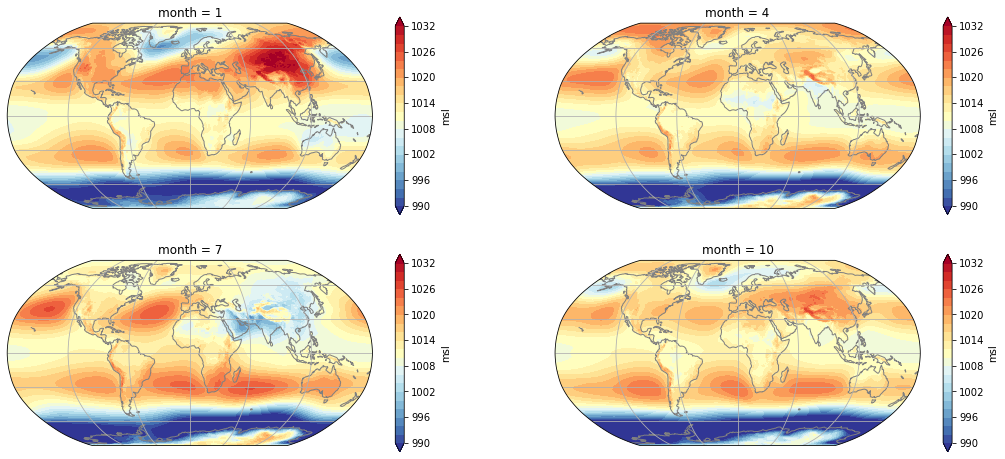

In [10]:
plt.figure(figsize=(18, 8))
ax = plt.subplot(2, 2, 1, projection=ccrs.Robinson())
msl.sel(month=1).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=levels, extend='both');
ax.coastlines(color='grey'); ax.gridlines(); ax.set_global();
ax = plt.subplot(2, 2, 2, projection=ccrs.Robinson())
msl.sel(month=4).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=levels, extend='both');
ax.coastlines(color='grey'); ax.gridlines(); ax.set_global();
ax = plt.subplot(2, 2, 3, projection=ccrs.Robinson())
msl.sel(month=7).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=levels, extend='both');
ax.coastlines(color='grey'); ax.gridlines(); ax.set_global();
ax = plt.subplot(2, 2, 4, projection=ccrs.Robinson())
msl.sel(month=10).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=levels, extend='both');
ax.coastlines(color='grey'); ax.gridlines(); ax.set_global();

## General circulation of the atmopshere

In [11]:
ds = xr.open_dataset('C:/Users/david/OneDrive - uibk.ac.at/MA/VU Physik des Klimasystems/LectureNotebooks/Week04//ERA5_LowRes_MonthlyAvg_4D_zuvw.nc')

### Geopotential and zonal winds 

**Compute $\left[ \overline{z_h} \right]$, where $z_h$ is the [geopotential height](https://en.wikipedia.org/wiki/Geopotential_height) (unit: m). Plot it (you can use ``.plot.contourf(levels=18, center=False)`` for example). Don't forget to put the y-axis in the right direction!**

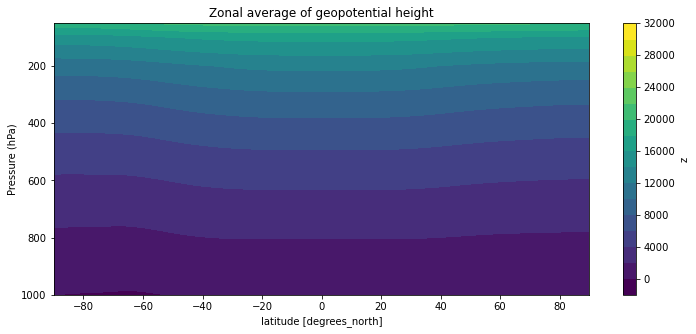

In [12]:
ds_zavg = ds.mean(dim=['month', 'longitude'])
z = ds_zavg.z / 9.81
z.plot.contourf(levels=18, center=False);
plt.ylim([1000, 50]);
plt.ylabel('Pressure (hPa)');
plt.title('Zonal average of geopotential height');

**What is the approximate average height of the 200hPa level at the poles? At the tropics? Not that easy to see, right? Instead, you can try to compute the anomaly of $\left[ \overline{z_h} \right]$ with respect to $\left\{ \left[ \overline{z_h} \right] \right\}$, where $\left\{ \right\}$ would represent the meridional average. Plot it (this time without the ``center`` keyword) and analyse the plot: what altitude difference is there at the 500hPa level between the equator and the poles? And at the 200hPa level? How does that fit into the thermal wind concept we discussed in the lecture?**

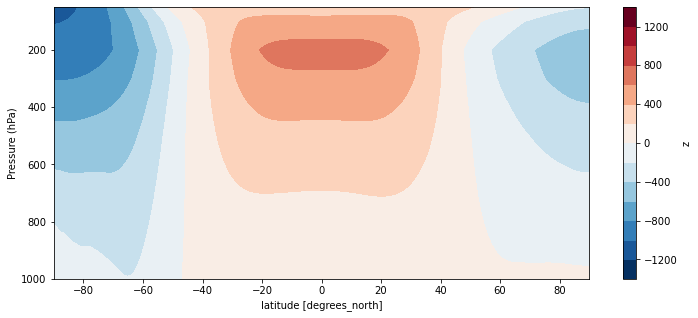

In [13]:
za = z - z.mean(dim='latitude')
za.plot.contourf(levels=18);
plt.ylim([1000, 50]);
plt.ylabel('Pressure (hPa)');

**Repeat the operation with the month of January and July. Analyse the differences.**

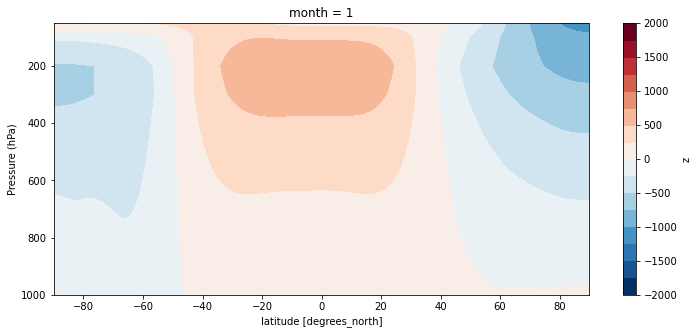

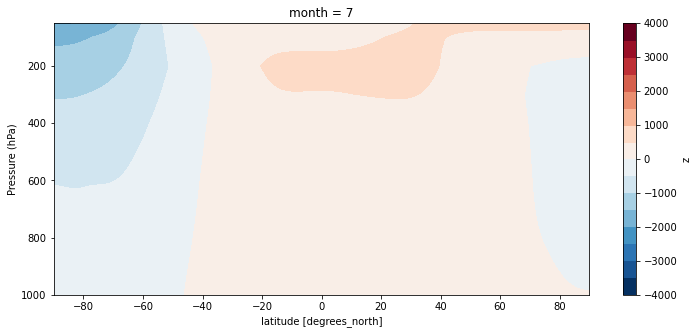

In [14]:
z = ds.z.sel(month=1).mean(dim='longitude') / 9.81
za = z - z.mean(dim='latitude')
za.plot.contourf(levels=18);
plt.ylim([1000, 50]);
plt.ylabel('Pressure (hPa)');
plt.figure()
z = ds.z.sel(month=7).mean(dim='longitude') / 9.81
za = z - z.mean(dim='latitude')
za.plot.contourf(levels=18);
plt.ylim([1000, 50]);
plt.ylabel('Pressure (hPa)');

**Now plot the zonal temporal average of the zonal wind $\left[ \overline{u} \right]$, for the annual average and the months of January and July. Analyse the plot: when and where is the zonal wind speed highest? Where is the zonal wind negative?**

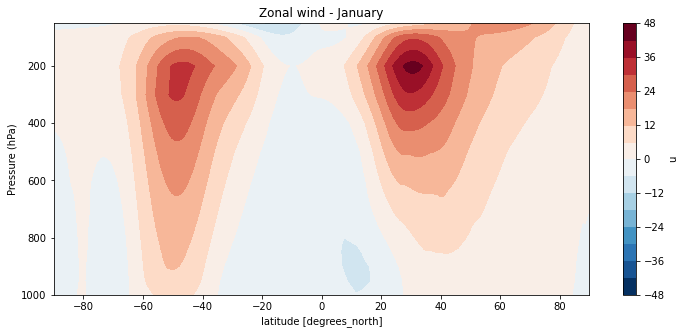

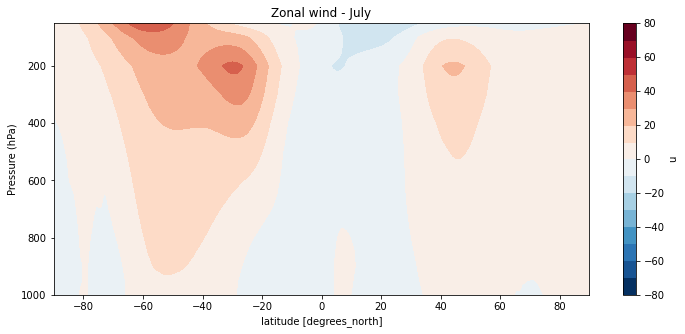

In [15]:
dst = ds.sel(month=1).mean(dim='longitude')
dst.u.plot.contourf(levels=18);
plt.ylim([1000, 50]);
plt.ylabel('Pressure (hPa)');
plt.title('Zonal wind - January');
plt.figure();
dst = ds.sel(month=7).mean(dim='longitude')
dst.u.plot.contourf(levels=18);
plt.ylim([1000, 50]);
plt.ylabel('Pressure (hPa)');
plt.title('Zonal wind - July');

### Meridional overturning circulation

**Compute the stram function of the meridional overturning circulation of the atmosphere fot the annual average and the months of January, April, July, and October. Plot all five with the same colors and levels for comparison. Analyse what you see.**

In [16]:
from scipy.integrate import cumtrapz
# some stuff we are going to need later
zcoords = ds.level * 100
fac = 2 * np.pi * 6371000 * np.cos(np.deg2rad(ds.latitude)) / 9.81
levels = np.linspace(-200, 200, 21)

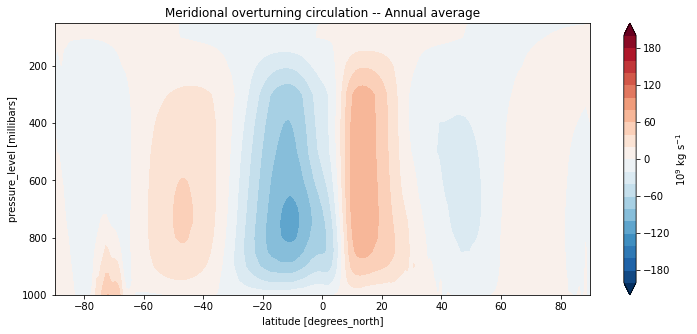

In [17]:
v = ds.v.mean(dim=['month', 'longitude'])
integral = cumtrapz(v, zcoords, axis=0, initial=0)
psi = v*0. + integral
# Convert to Sverdrups:
psi = psi * fac / 1e9
psi.plot.contourf(levels=levels, extend='both', cbar_kwargs={'label':'10$^9$ kg s$^{-1}$'})
plt.title('Meridional overturning circulation -- Annual average')
plt.ylim([1000, 50]);

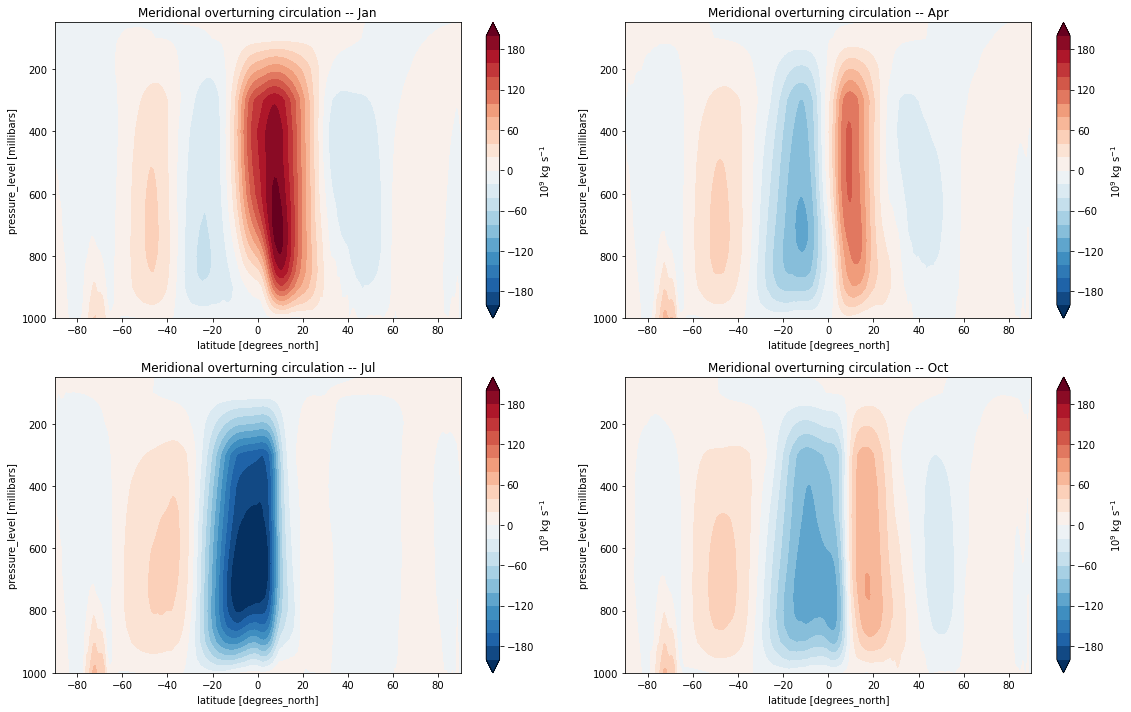

In [18]:
plt.figure(figsize=(16, 10));
mo = [1, 4, 7, 10]
txt = ['Jan', 'Apr', 'Jul', 'Oct']
for i in range(4):
    plt.subplot(2, 2, i+1)
    v = ds.v.sel(month=mo[i]).mean(dim='longitude')
    integral = cumtrapz(v, zcoords, axis=0, initial=0)
    psi = v*0. + integral
    # Convert to Sverdrups:
    psi = psi * fac / 1e9
    psi.plot.contourf(levels=levels, extend='both', cbar_kwargs={'label':'10$^9$ kg s$^{-1}$'})
    plt.title('Meridional overturning circulation -- ' + txt[i])
    plt.ylim([1000, 50]);
plt.tight_layout();

### Optional: stationary waves in the mid- and upper troposphere 

"Stationary waves" or "stationary eddies" are circulations which are absent from the zonal mean, but visible in the temporal average of the wind field (see lecture). A nice way to visualize stationary waves is simply to plot $\overline{z^{*}}$ (with $z$ the geopotential). Remember what this is? We computed this anomaly in the "temperature and precipitation data" assignment last week. 

**Select data in one hemisphere (NH or SH), for one pressure level and for one month, and plot $\overline{z^{*}}$ on a map. Nice, huh?**

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: Shap

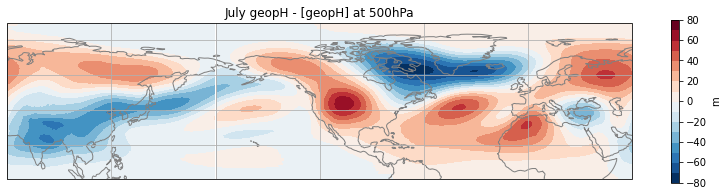

In [19]:
z = ds.z.sel(month=7, latitude=slice(90, 0), level=500).load() / 9.81
z = z - z.mean(dim='longitude')

# u = ds.u.sel(month=7, latitude=slice(90, 0), level=500).load()
# v = ds.v.sel(month=7, latitude=slice(90, 0), level=500).load()
# u = u - u.mean(dim='longitude')
# v = v - v.mean(dim='longitude')

f = plt.figure(figsize=(14, 3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120))
z.plot.contourf(ax=ax, levels=18, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'m'});

# pu, pv = u[::9,::9], v[::9,::9]  # we will discuss what this line does in the cells below
# qv = ax.quiver(pu.longitude.data, pu.latitude.data, pu.data, pv.data, transform=ccrs.PlateCarree())

ax.coastlines(color='grey'); ax.gridlines(); ax.set_extent([-170, 60., 0, 90]);
plt.title(r'July geopH - [geopH] at 500hPa');

C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\david\miniconda3\lib\site-packages\cartopy\crs.py:877: Shap

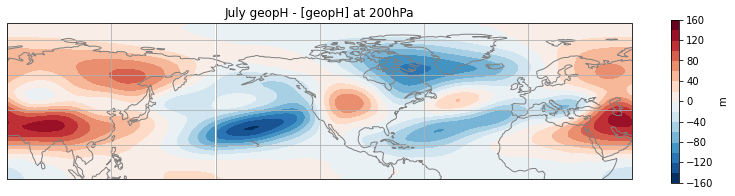

In [20]:
z = ds.z.sel(month=7, latitude=slice(90, 0), level=200).load() / 9.81
z = z - z.mean(dim='longitude')
f = plt.figure(figsize=(14, 3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-120))
z.plot.contourf(ax=ax, levels=18, transform=ccrs.PlateCarree(), cbar_kwargs={'label':'m'});
ax.coastlines(color='grey'); ax.gridlines(); ax.set_extent([-170, 60., 0, 90]);
plt.title(r'July geopH - [geopH] at 200hPa');

## Additional analyses

### Hovmöller plots

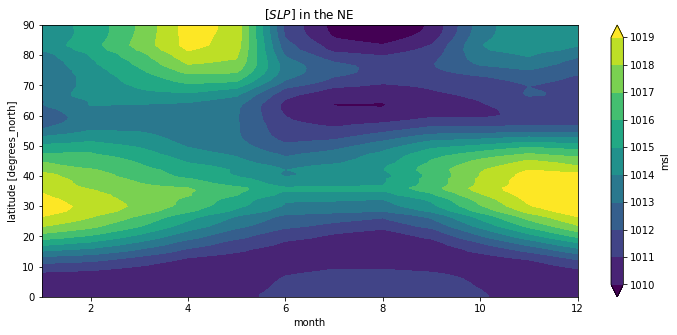

In [21]:
mslne = msl.sel(latitude=slice(90, 0)).mean(dim='longitude')
mslne.T.plot.contourf(levels=np.linspace(1010, 1019, 10), cbar_kwargs={'format':'%d'});
plt.title(r'$\left[ SLP \right]$ in the NE');

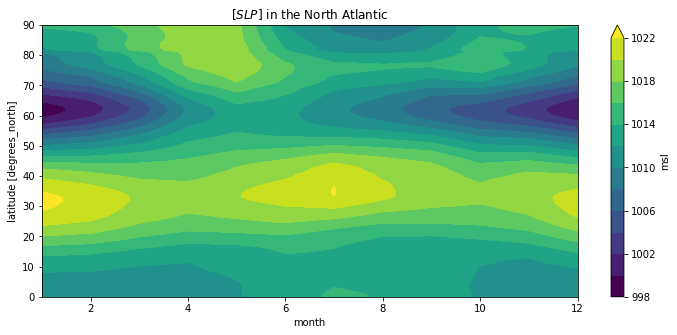

In [22]:
mslne = msl.sel(latitude=slice(90, 0), longitude=slice(-60, 0)).mean(dim='longitude')
mslne.T.plot.contourf(levels=np.linspace(998, 1022, 13), cbar_kwargs={'format':'%d'});
plt.title(r'$\left[ SLP \right]$ in the North Atlantic');

### Geostrophic winds in the lower troposphere 

**Plot January $\overline{z_h}$ at the 950 hPa level on a map. Can you see a problem with this plot? Yes, indeed, it is as if there were no mountains on Earth.**

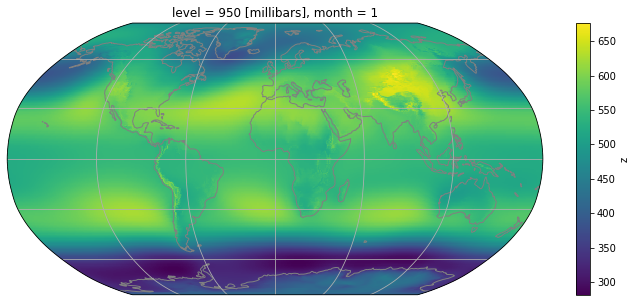

In [19]:
zh = ds.z.sel(month=1, level=950) / 9.8
ax = plt.axes(projection=ccrs.Robinson())
zh.plot(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines(color='grey'); ax.gridlines();

**With the help of the invariant dataset, mask out the land pixels from $\overline{z_h}$ computed above so that we look at the geopotential height over the oceans only. Compute the geostrophic wind components $u_g$ and $v_g$ out of it. Plot $\overline{z_h}$ on a map, and overlay $u_g$ and $v_g$ on it using a quiver plot. Analyse what you see.**

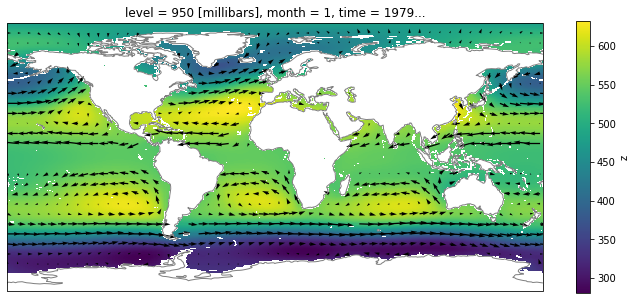

In [20]:
# invariant dataset
dsi = xr.open_dataset('../data/ERA5_LowRes_Invariant.nc').isel(time=0)
# coriolis
g = 9.81
f = 2. * 7.292115e-5 * np.sin(np.deg2rad(ds.latitude))
f = f.where((np.abs(ds.latitude) > 5) & (np.abs(ds.latitude) < 85))
# geopotential
z = ds.z.sel(month=1, level=950).load() / g
z = z.where(dsi.lsm == 0)
# gradients and winds
grad_y, grad_x = np.gradient(z, -np.deg2rad(.75), np.deg2rad(.75))
grad_x = z*0 + grad_x
grad_y = z*0 + grad_y
dx = 1 / (6371000 * np.cos(np.deg2rad(z.latitude)))
dy = 1 / (6371000)
ug = - g / f * dy * grad_y
vg = g / f * dx * grad_x
wsg = (ug**2 + vg**2)**0.5
# plot
ax = plt.axes(projection=ccrs.PlateCarree())
pu, pv = ug[::9,::9], vg[::9,::9]
z.plot.imshow(transform=ccrs.PlateCarree())
qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
ax.coastlines(color='grey');

**By noting that the wind field can always be decomposed in the the sum of a geostrophic and an ageostrophic component, compute the ageostrophic wind $u_{ag}$ and $v_{ag}$. Plot $\overline{z_h}$ on a map, and overlay $u_{ag}$ and $v_{ag}$ on it using a quiver plot. Analyse what you see in relation to the plot above.**

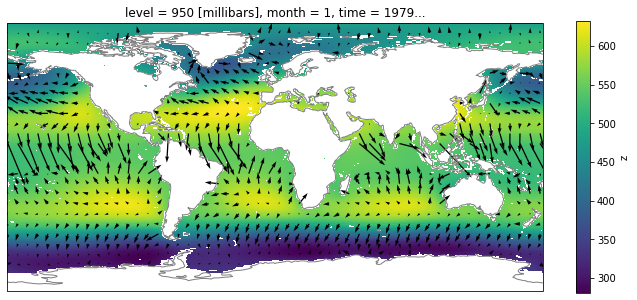

In [21]:
divu = ds.u.sel(month=1, level=950) - ug
divv = ds.v.sel(month=1, level=950) - vg
ax = plt.axes(projection=ccrs.PlateCarree())
pu, pv = divu[::9,::9], divv[::9,::9]
z.plot.imshow(transform=ccrs.PlateCarree())
qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
ax.coastlines(color='grey');